---
layout: default
title: "Deep Learning - Speed up learning - Tuning"
categories: deeplearning
permalink: /ML31/
order: 31
comments: true
---

In [2]:
%pylab --no-import-all inline
from plot_ann import ann

Populating the interactive namespace from numpy and matplotlib


# Hyperparameter tuning

## Learning rate decay
Learning rate decay is a technique where you slowly reduce the learning rate over the training iterations.

The intuition behind learning rate decay is represented in <a href="#fig:lrdecay">the figure below</a>. When approaching the optimum during gradient descent, if the learning rate remains constant, it may diverge from the optimum. Instead, we want gradient descent to take larger steps when we are far from the optimum and smaller steps when we are close to the optimum, so that even if the model never converges, it can hover close enough to the optimum to give good results.

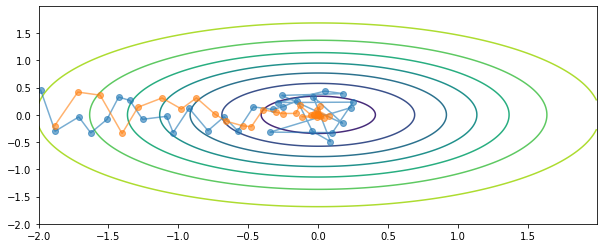

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
x, y = np.mgrid[-2:2:.01, -2:2:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, .05], [0, .7]])
ax.contour(x, y, -rv.pdf(pos))

epochs = 20
x = np.linspace(-2, 0, epochs)
ax.plot(np.r_[x+(np.random.rand(epochs)*.1), np.random.rand(10)-.5], np.r_[np.random.rand(epochs)-.5, np.random.rand(10)-.5], alpha=.6, marker='o')
ax.plot(np.r_[x+(np.random.rand(epochs)*.1), np.random.rand(10)-.5]*np.arange(0, epochs+10)[::-1]/(epochs+10), 
        np.r_[np.random.rand(epochs)-.5, np.random.rand(10)-.5]*np.arange(epochs+10)[::-1]/(epochs+10), alpha=.6, marker='o');

<i id="fig:lrdecay">A bidimensional feature space with contours of iso-values of the cost $J$ with gradient descent steps taken with constant learning rate (blue) and decaying learning rate (orange).</i>

In learning rate decay, our learning rate $\alpha$ becomes smaller each epoch, according to a system. There are different systems, among the most common way of computing $\alpha$ we have

$$
\begin{aligned}
& \alpha = \frac{1}{1+d \cdot \tau} \alpha_0 \\
& \\
& \alpha = 0.95^\tau \cdot \alpha_0 \\
& \\
& \alpha = \frac{k}{\sqrt{\tau}} \cdot \alpha_0 \\
& \\
& \alpha = \frac{k}{\sqrt{t}} \cdot \alpha_0 \\
\end{aligned}
$$

where $k$ is a constant, $t$ is the mini-batch number and $\tau$ is the epoch-number.

Sometimes instead **manual decay** is applied. This means that while the algorithm is training, you can evaluate the the learning rate needs to be tuned down and setting it manually.

## Tuning process
How to organize your hyperparameters tuning process. In deep-learning you come across many hyper-parameters: We have seen:

* the learning rate $\alpha$ (if you are using a constant learning rate)
* the momentum parameter $\beta$
* the parameters $\beta_1, \beta_2, \epsilon$ if using ADAM optimization
* the number of hidden layers
* the number of hidden units in each layer
* the number of epochs
* the learning rate decay system and its parameter and possibly its parameter $k$
* the mini-batch size $t$

In many cases, if sorted by their importance the list would be: 

1. The single most important hyperparameter in almost all situations is the learning rate $\alpha$. 
2. Second in importance come
    * the momentum parameter $\beta$, for which $0.9$ is found to be be a good default parameter. 
    * the the mini-batch size
    * the number of hidden units in layers
3. Third in importance come 
    * the number of layers (that can sometime make a huge difference)
    * the learning rate decay
4. When using an ADAM optimization algorithm usually its parameters are never tuned and the default are kept ($0.9, 0.999, 10^{-8}$)

However it is very difficult to give a general rule for the importance of hyperparameters and each model tend to behave differently.

### Hyperparameter exploration
In early days of machine learning, practitioners would sample the space of hyperparameters systematically, by testing combinations of intervals of hyperparameters (<a href="#fig:hypertune">figure below</a>, panel A). Usually, when tuning deep-learning hyperparameters, their space is sampled randomly (<a href="#fig:hypertune">figure below</a>, panel B), since it is almost impossible to know in advance which hyperparameter will have more impact on the model, but at the same time some hyperparameters tend to be much more important than others

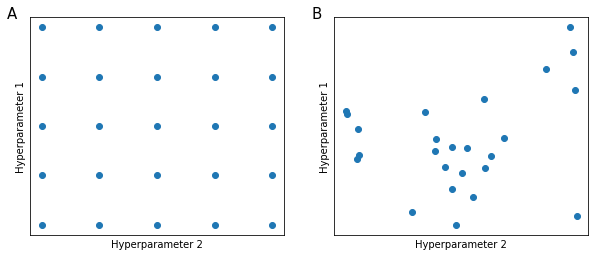

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

x = np.linspace(0, 1, 5)
x, y = np.meshgrid(x, x)
axes[0].plot(x, y, ls='none', marker='o', c='C0')
axes[1].plot(*np.random.rand(2, 25), ls='none', marker='o')

for ax, l in zip(axes, 'AB'):
    ax.text(-0.05, 1.05, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.set_xlabel('Hyperparameter 2')
    ax.set_ylabel('Hyperparameter 1')

<i id="fig:hypertune">Hyperparameter space sampling in early days of machine learning (A) and in modern days of deep-learning (B)</i>

This is done because when sampling the hyperparameter space as in <a href="#fig:hypertune">figure above</a> panel A, for each column of hyperparameters, you will test 5 values of Hyperparameter 1 but only 1 value of Hyperparameter 2, whereas each point <a href="#fig:hypertune">figure above</a> panel B, is a different set of Hyperparameters 1 and 2.